In [2]:
import pandas as pd
import numpy as np
from PIL import Image
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

In [3]:
plane_img = Image.open('3096_colorPlane.jpg')
bird_img = Image.open('42049_colorBird.jpg')

PLANE

In [4]:
plane_rgb = asarray(plane_img)

In [5]:
plane_rgb_arr = plane_rgb.astype('float32')

In [6]:
temp =[]
vert = len(plane_rgb)
horz = len(plane_rgb[0])
for i in range(vert):
    for j in range(horz):
        temp_new = [i,j]
        temp_new.append(plane_rgb_arr[i][j][0])
        temp_new.append(plane_rgb_arr[i][j][1])
        temp_new.append(plane_rgb_arr[i][j][2])
        temp.append(temp_new)
temp = np.asmatrix(temp)

In [7]:
plane_data = pd.DataFrame(temp, columns=["horizontal", "vertical", "red","green","blue"])
plane_data.head()

,horizontal,vertical,red,green,blue
0,0.0,0.0,138.0,138.0,148.0
1,0.0,1.0,138.0,138.0,148.0
2,0.0,2.0,138.0,138.0,148.0
3,0.0,3.0,137.0,137.0,147.0
4,0.0,4.0,137.0,137.0,147.0


In [8]:
plane_data.tail()

,horizontal,vertical,red,green,blue
154396,320.0,476.0,85.0,98.0,115.0
154397,320.0,477.0,86.0,99.0,116.0
154398,320.0,478.0,84.0,97.0,114.0
154399,320.0,479.0,80.0,93.0,110.0
154400,320.0,480.0,54.0,64.0,74.0


In [9]:
plane_min_max = MinMaxScaler()
plane_min_max.fit(plane_data)

MinMaxScaler()

In [10]:
plane_data_scaled= plane_min_max.fit_transform(plane_data)
plane_data_scaled=pd.DataFrame(plane_data_scaled,columns=['horizontal','vertical','red','green','blue'])
plane_data_scaled.head()

,horizontal,vertical,red,green,blue
0,0.0,0.000000,0.750000,0.754098,0.826816
1,0.0,0.002083,0.750000,0.754098,0.826816
2,0.0,0.004167,0.750000,0.754098,0.826816
3,0.0,0.006250,0.744565,0.748634,0.821229
4,0.0,0.008333,0.744565,0.748634,0.821229


In [11]:
from sklearn import decomposition
from sklearn.decomposition import PCA

columns = ['horizontal','vertical','red','green','blue']
PC = PCA()
PC.fit(plane_data_scaled)

PCA()

In [12]:
print(PC.components_)

[[ 8.26391831e-01  7.89013400e-02 -3.53000946e-01 -3.04060989e-01
  -3.06248865e-01]
 [ 9.69382446e-02 -9.95023547e-01 -1.22432834e-02 -1.87517711e-04
   1.95239573e-02]
 [-5.51344821e-01 -5.85189681e-02 -4.60528856e-01 -4.37244386e-01
  -5.37889337e-01]
 [-6.08144405e-02  1.66340055e-02 -6.40337125e-01 -1.69449411e-01
   7.46512008e-01]
 [ 1.03351035e-04 -1.24904482e-03  5.03112287e-01 -8.29247324e-01
   2.43362551e-01]]


In [13]:
print(PC.explained_variance_)

[1.01513903e-01 8.37252612e-02 4.51903087e-02 1.27507260e-03
 4.43843613e-05]


In [14]:
print(PC.explained_variance_ratio_)

[4.38033966e-01 3.61275719e-01 1.94996839e-01 5.50195682e-03
 1.91519164e-04]


In [15]:
plane_pca = PC.fit_transform(plane_data_scaled)

In [16]:
plane_pca_data = pd.DataFrame(plane_pca,columns=['PC1','PC2','PC3','PC4','PC5'])

In [17]:
plane_pca_data.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.563479,0.449462,0.141527,-0.001870,0.002300
1,-0.563314,0.447389,0.141405,-0.001835,0.002297
2,-0.563150,0.445316,0.141283,-0.001800,0.002295
3,-0.557694,0.443201,0.149058,-0.001530,0.002730
4,-0.557530,0.441128,0.148936,-0.001496,0.002727


In [18]:
PC.explained_variance_ratio_

array([4.38033966e-01, 3.61275719e-01, 1.94996839e-01, 5.50195682e-03,
       1.91519164e-04])

In [19]:
plane_data2 = pd.DataFrame({'var':PC.explained_variance_ratio_,'PC':
['PC1','PC2','PC3','PC4','PC5']})

In [20]:
plane_data2

,var,PC
0,0.438034,PC1
1,0.361276,PC2
2,0.194997,PC3
3,0.005502,PC4
4,0.000192,PC5


<AxesSubplot:xlabel='PC', ylabel='var'>

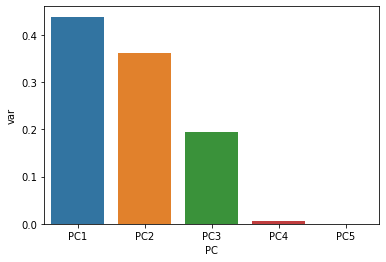

In [21]:
import seaborn as sns
sns.barplot(x='PC',y='var',data=plane_data2)

2 D representation is worthy to represent the data 

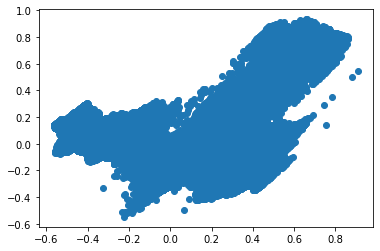

In [22]:
import matplotlib.pyplot as plt
plt.scatter('PC1','PC3',data=plane_pca_data)

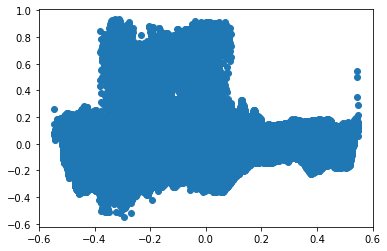

In [23]:
plt.scatter('PC2','PC3',data=plane_pca_data)

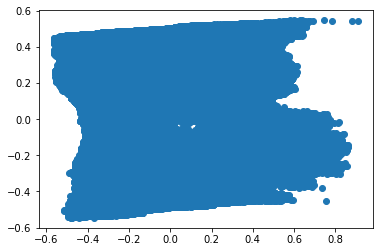

In [24]:
plt.scatter('PC1','PC2',data=plane_pca_data)

TSNE Plots

In [25]:
from sklearn.manifold import TSNE
plane_tsne_30 = TSNE(n_components=2,perplexity=30)
plane_tsne_50 = TSNE(n_components=2,perplexity=40)
plane_tsne_70 = TSNE(n_components=2,perplexity=70)

In [26]:
plane_tsne30_res = plane_tsne_30.fit_transform(plane_data_scaled)

In [27]:
plane_tsne50_res = plane_tsne_50.fit_transform(plane_data_scaled)

In [28]:
plane_tsne70_res = plane_tsne_70.fit_transform(plane_data_scaled)

In [29]:
plane_tsne30_data = pd.DataFrame(data=plane_tsne30_res,columns=['d1','d2'])
plane_tsne50_data = pd.DataFrame(data=plane_tsne50_res,columns=['d1','d2'])
plane_tsne70_data = pd.DataFrame(data=plane_tsne70_res,columns=['d1','d2'])

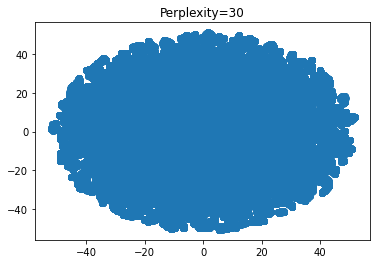

In [30]:
plt.scatter('d1','d2',data=plane_tsne30_data)
plt.title('Perplexity=30')
plt.show()

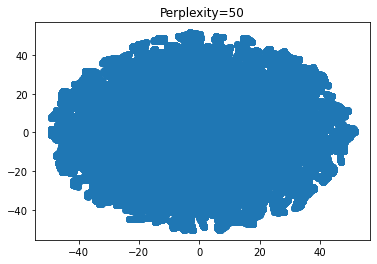

In [31]:
plt.scatter('d1','d2',data=plane_tsne50_data)
plt.title('Perplexity=50')
plt.show()

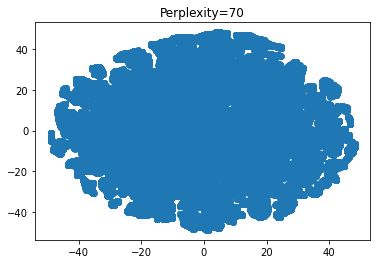

In [32]:
plt.scatter('d1','d2',data=plane_tsne70_data)
plt.title('Perplexity=70')
plt.show()

bird

In [33]:
bird_rgb = asarray(bird_img)
birdtemp =[]
bird_array = bird_rgb.astype('float32')
horizontal = len(bird_rgb[0])
vertical = len(bird_rgb)
for i in range(vertical):
    for j in range(horizontal):
        birdtemp_new = [i,j]
        birdtemp_new.append(bird_array[i][j][0])
        birdtemp_new.append(bird_array[i][j][1])
        birdtemp_new.append(bird_array[i][j][2])
        birdtemp.append(birdtemp_new)
birdtemp = np.asmatrix(birdtemp)
bird_data = pd.DataFrame(birdtemp, columns=["horizontal", "vertical", "red","green","blue"])
bird_data.head()

,horizontal,vertical,red,green,blue
0,0.0,0.0,59.0,87.0,111.0
1,0.0,1.0,60.0,88.0,112.0
2,0.0,2.0,61.0,89.0,113.0
3,0.0,3.0,63.0,91.0,115.0
4,0.0,4.0,65.0,93.0,117.0


In [34]:
bird_data.tail()

,horizontal,vertical,red,green,blue
154396,320.0,476.0,44.0,54.0,55.0
154397,320.0,477.0,45.0,50.0,54.0
154398,320.0,478.0,27.0,27.0,35.0
154399,320.0,479.0,29.0,27.0,38.0
154400,320.0,480.0,88.0,102.0,128.0


In [35]:
bird_minmax = MinMaxScaler()

In [36]:
bird_minmax.fit(bird_data)

MinMaxScaler()

In [37]:
bird_scaled_data= bird_minmax.fit_transform(bird_data)
bird_scaled_data=pd.DataFrame(bird_scaled_data,columns=['horizontal','vertical','red','green','blue'])
bird_scaled_data.head()

,horizontal,vertical,red,green,blue
0,0.0,0.000000,0.241803,0.345238,0.445783
1,0.0,0.002083,0.245902,0.349206,0.449799
2,0.0,0.004167,0.250000,0.353175,0.453815
3,0.0,0.006250,0.258197,0.361111,0.461847
4,0.0,0.008333,0.266393,0.369048,0.469880


In [38]:
columns = ['horizontal','vertical','red','green','blue']

In [39]:
BC = decomposition.PCA(n_components=5)
bird_pca = BC.fit_transform(bird_scaled_data[columns].values)

In [40]:
bird_pca_data = pd.DataFrame(bird_pca,columns=['PC1','PC2','PC3','PC4','PC4'])

In [41]:
bird_pca_data.head()

,PC1,PC2,PC3,PC4,PC4
0,0.511214,0.711108,0.134138,-0.152850,-0.027396
1,0.504150,0.709663,0.133438,-0.152206,-0.027750
2,0.497086,0.708219,0.132739,-0.151563,-0.028105
3,0.483431,0.706733,0.129874,-0.150271,-0.028803
4,0.469777,0.705247,0.127008,-0.148979,-0.029502


In [42]:
BC.explained_variance_ratio_

array([4.64003841e-01, 2.74424861e-01, 2.54012794e-01, 7.10838238e-03,
       4.50121605e-04])

In [43]:
bird_new_data = pd.DataFrame({'var':BC.explained_variance_ratio_,'PC':['PC1','PC2','PC3','PC4','PC5']})

In [44]:
bird_new_data

,var,PC
0,0.464004,PC1
1,0.274425,PC2
2,0.254013,PC3
3,0.007108,PC4
4,0.000450,PC5


<AxesSubplot:xlabel='PC', ylabel='var'>

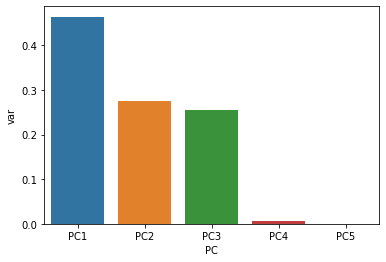

In [45]:
sns.barplot(x='PC',y='var',data=bird_new_data)

2D is the smallest, reasonable value of D to present a good representation of the data

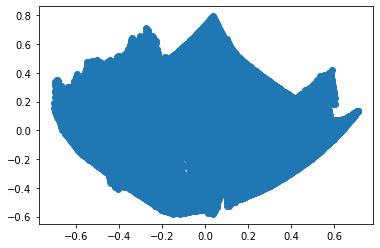

In [46]:
plt.scatter('PC2','PC3',data=bird_pca_data)

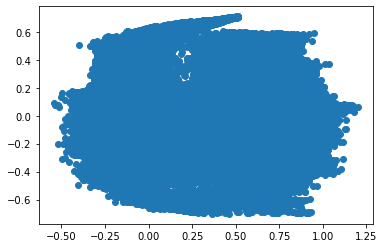

In [47]:
plt.scatter('PC1','PC2',data=bird_pca_data)

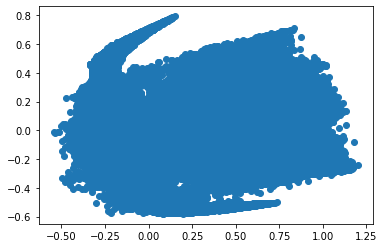

In [48]:
plt.scatter('PC1','PC3',data=bird_pca_data)

In [49]:
bird_tsne_30 = TSNE(n_components=2,perplexity=30)
bird_tsne_50 = TSNE(n_components=2,perplexity=40)
bird_tsne_70 = TSNE(n_components=2,perplexity=70)

In [50]:
bird_tsne30_res = bird_tsne_30.fit_transform(bird_scaled_data)

In [51]:
bird_tsne50_res = bird_tsne_50.fit_transform(bird_scaled_data)

In [52]:
bird_tsne70_res = bird_tsne_70.fit_transform(bird_scaled_data)

In [53]:
bird_tsne30_data = pd.DataFrame(data=bird_tsne30_res,columns=['d1','d2'])
bird_tsne50_data = pd.DataFrame(data=bird_tsne50_res,columns=['d1','d2'])
bird_tsne70_data = pd.DataFrame(data=bird_tsne70_res,columns=['d1','d2'])

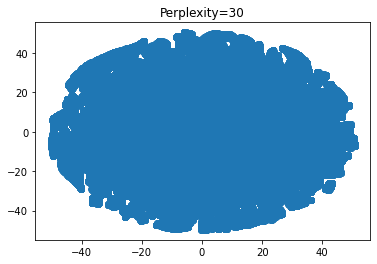

In [54]:
plt.scatter('d1','d2',data=bird_tsne30_data)
plt.title('Perplexity=30')

plt.show()

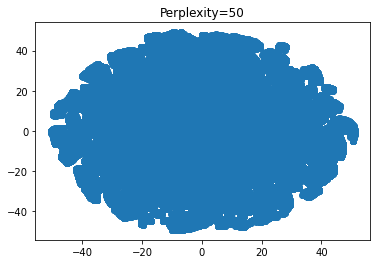

In [55]:
plt.scatter('d1','d2',data=bird_tsne50_data)
plt.title('Perplexity=50')
plt.show()

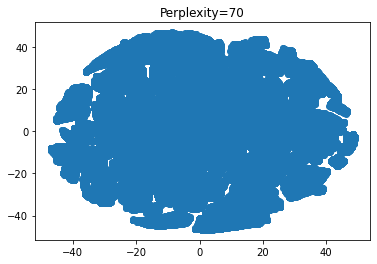

In [56]:
plt.scatter('d1','d2',data=bird_tsne70_data)
plt.title('Perplexity=70')
plt.show()

K Means clustering

Plane

Clustering results in form of an image of thse label values

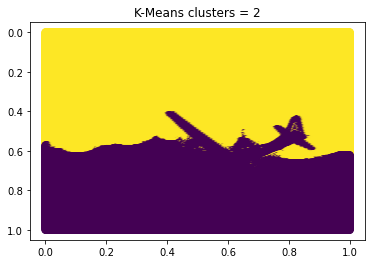

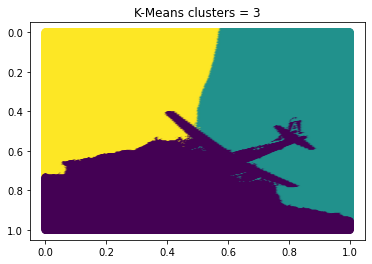

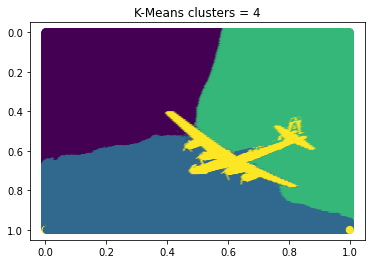

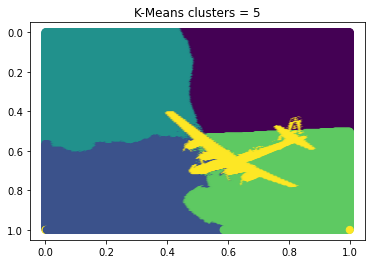

In [57]:
from sklearn.cluster import KMeans
for cluster in [2,3,4,5]:
    k_means = KMeans(n_clusters=cluster,random_state=0)
    k_means.fit(plane_data_scaled)
    lab = k_means.labels_
    # plt.figure(figsize=(8,8))
    plt.scatter(plane_data_scaled.iloc[:,1],y=plane_data_scaled.iloc[:,0],c=lab,s=50)
    plt.title('K-Means clusters = %d'%cluster)
    plt.gca().invert_yaxis()
    plt.show()

KMeans 2 Clusters CH and Sihouette score

In [58]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
km = KMeans(n_clusters=2).fit(plane_data_scaled)
label = km.labels_
print('CH score',calinski_harabasz_score(plane_data_scaled,label))
print('Silhouette score',silhouette_score(plane_data_scaled,label))

CH score 77052.09716799544
Silhouette score 0.33949886353854053


KMeans 3 Clusters CH and Sihouette score

In [59]:
k_means = KMeans(n_clusters=3).fit(plane_data_scaled)
label = k_means.labels_
print('CH score',calinski_harabasz_score(plane_data_scaled,label))
print('Silhouette score',silhouette_score(plane_data_scaled,label))

CH score 85239.52268673561
Silhouette score 0.34546898231871376


KMeans 4 Clusters CH and Sihouette score

In [60]:
k_means = KMeans(n_clusters=4).fit(plane_data_scaled)
label = k_means.labels_
print('CH score',calinski_harabasz_score(plane_data_scaled,label))
print('Silhouette score',silhouette_score(plane_data_scaled,label))

CH score 102536.28001445875
Silhouette score 0.38892444342699445


KMeans 5 Clusters CH and Sihouette score

In [61]:
k_means = KMeans(n_clusters=5).fit(plane_data_scaled)
label = k_means.labels_
print('CH score',calinski_harabasz_score(plane_data_scaled,label))
print('Silhouette score',silhouette_score(plane_data_scaled,label))

CH score 129831.70013132812
Silhouette score 0.41086878308704977


Best Values of k is 5 as silhouette score is high compared to any other plots and also the plot looks better
while plotted as above

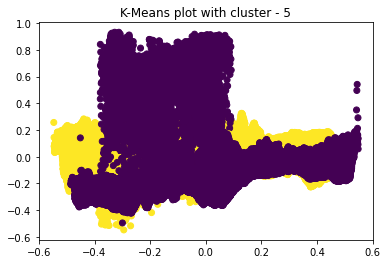

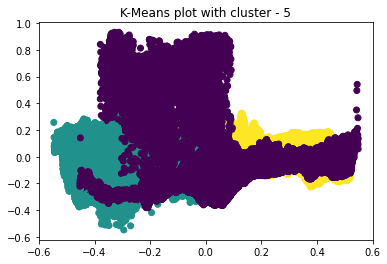

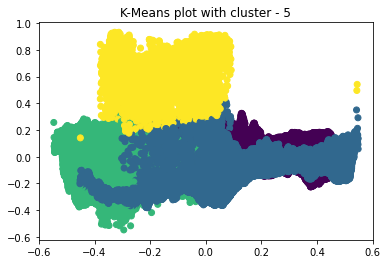

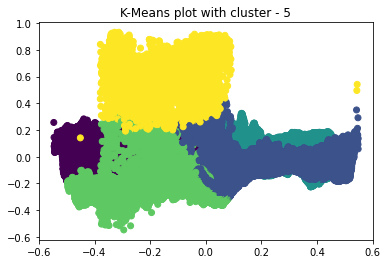

In [62]:
for i in [2,3,4,5]:
    km = KMeans(n_clusters=i,random_state=0).fit(plane_data_scaled)
    y_label =km.labels_
    # plt.figure(figsize=(4,4))
    plt.scatter(x=plane_pca[:,1],y=plane_pca[:,2],c=y_label)
    plt.title('K-Means plot with cluster - %d'%cluster)
    plt.show()

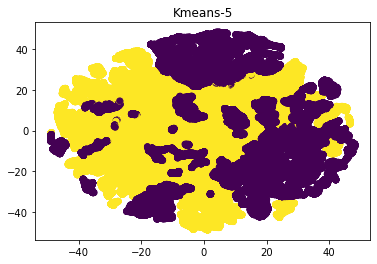

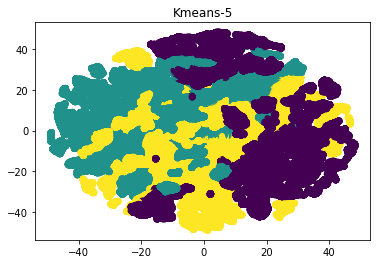

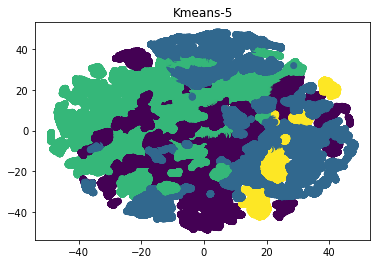

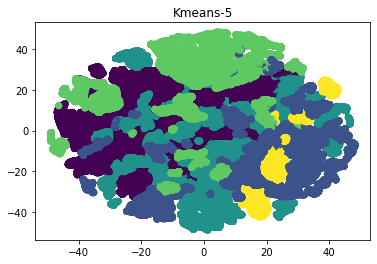

In [63]:
for i in [2,3,4,5]:
    km = KMeans(n_clusters=i,random_state=0).fit(plane_data_scaled)
    y_label =km.labels_
    # plt.figure(figsize=(4,4))
    plt.scatter(x=plane_tsne70_res[:,0],y=plane_tsne70_res[:,1],c=y_label)
    plt.title('Kmeans-%d'%cluster)
    plt.show()

Returning PCA and TSNE plots to display clustering results

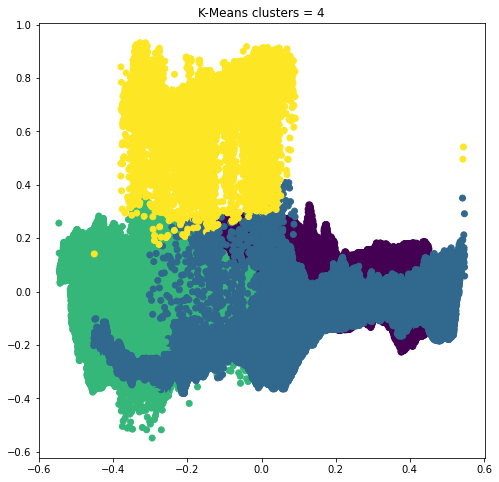

In [64]:
k_means = KMeans(n_clusters=4,random_state=0).fit(plane_data_scaled)
y_label =k_means.labels_
plt.figure(figsize=(8,8))
plt.scatter(x=plane_pca[:,1],y=plane_pca[:,2],c=y_label)
plt.title('K-Means clusters = 4')
plt.show()

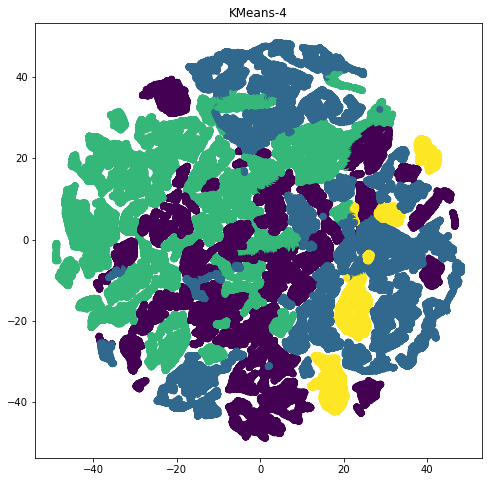

In [65]:
k_means = KMeans(n_clusters=4,random_state=0).fit(plane_data_scaled)
y_label =k_means.labels_
plt.figure(figsize=(8,8))
plt.scatter(x=plane_tsne70_res[:,0],y=plane_tsne70_res[:,1],c=y_label)
plt.title('KMeans-4')
plt.show()

Bird

Clustering results ->image of thse label values

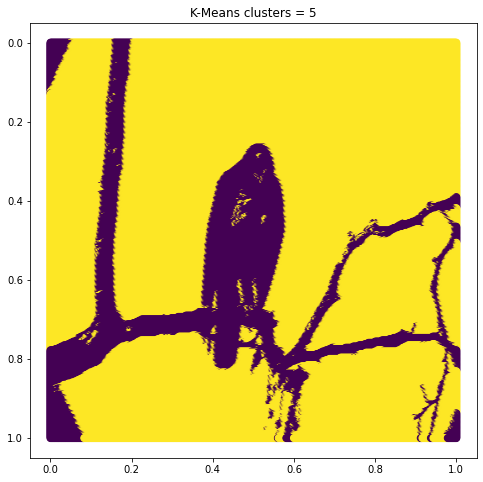

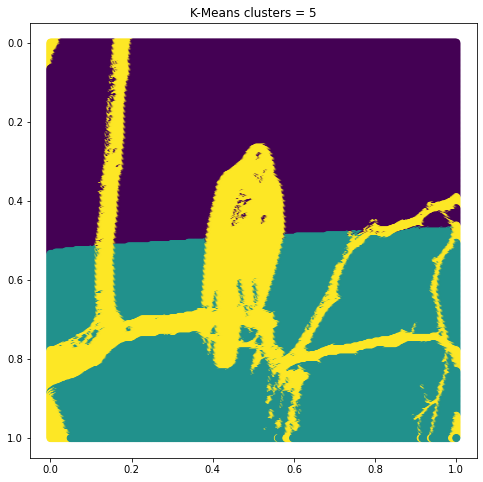

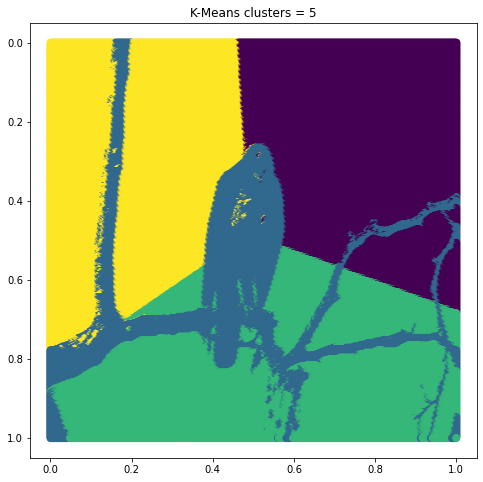

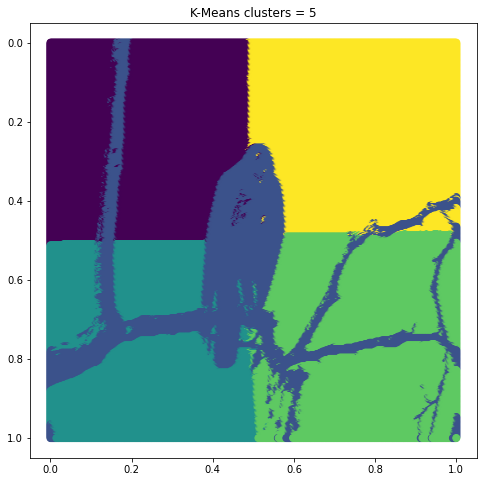

In [66]:
for i in [2,3,4,5]:
    k_means = KMeans(n_clusters=i,random_state=0)
    k_means.fit(bird_scaled_data)
    lab = k_means.labels_
    plt.figure(figsize=(8,8))
    plt.scatter(bird_scaled_data.iloc[:,1],y=bird_scaled_data.iloc[:,0],c=lab,s=50)
    plt.gca().invert_yaxis()
    plt.title('K-Means clusters = %d'%cluster)
    plt.show()

KMeans 2 Clusters CH and Sihouette score

In [67]:
k_means = KMeans(n_clusters=2).fit(bird_scaled_data)
label = k_means.labels_
print('CH score',calinski_harabasz_score(bird_scaled_data,label))
print('Silhouette score',silhouette_score(bird_scaled_data,label))

CH score 101966.14080503918
Silhouette score 0.46489097162036247


In [68]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
k_means = KMeans(n_clusters=3).fit(bird_scaled_data)
label = k_means.labels_
print('CH score',calinski_harabasz_score(bird_scaled_data,label))
print('Silhouette score',silhouette_score(bird_scaled_data,label))

CH score 107333.83712884899
Silhouette score 0.3684905980853545


KMeans 4 Clusters CH and Sihouette score

In [69]:
k_means = KMeans(n_clusters=4).fit(bird_scaled_data)
label = k_means.labels_
print('CH score',calinski_harabasz_score(bird_scaled_data,label))
print('Silhouette score',silhouette_score(bird_scaled_data,label))

CH score 120414.8669162042
Silhouette score 0.3917264274114797


KMeans 5 Clusters CH and Sihouette score

In [70]:
k_means = KMeans(n_clusters=5).fit(bird_scaled_data)
label = k_means.labels_
print('CH score',calinski_harabasz_score(bird_scaled_data,label))
print('Silhouette score',silhouette_score(bird_scaled_data,label))

CH score 128907.4598309075
Silhouette score 0.4051197079525801


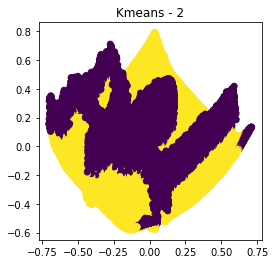

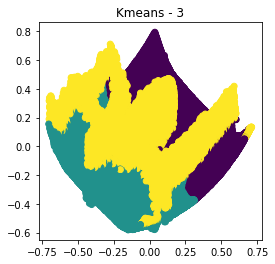

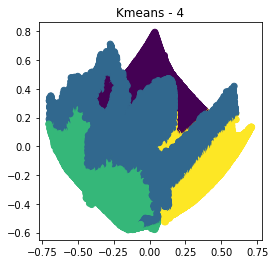

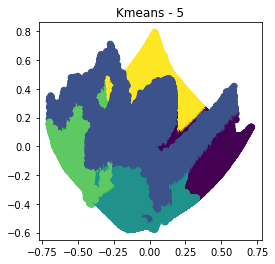

In [71]:
### PCA and TSNE results for all clusters
for cluster in [2,3,4,5]:
    km = KMeans(n_clusters=cluster,random_state=0).fit(bird_scaled_data)
    y_label =km.labels_
    plt.figure(figsize=(4,4))
    plt.scatter(x=bird_pca[:,1],y=bird_pca[:,2],c=y_label)
    plt.title('Kmeans - %d'%cluster)
    plt.show()

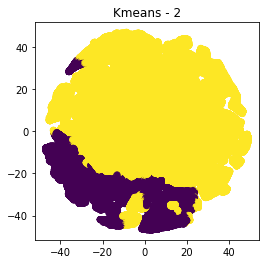

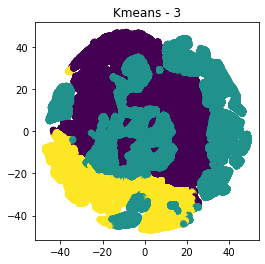

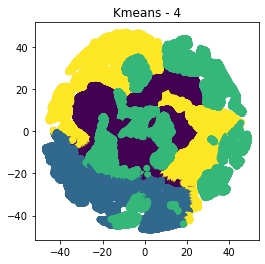

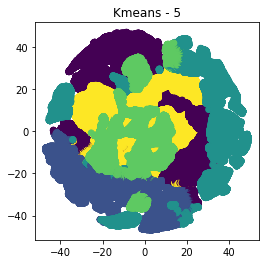

In [72]:
for cluster in [2,3,4,5]:
    km = KMeans(n_clusters=cluster,random_state=0).fit(bird_scaled_data)
    y_label =km.labels_
    plt.figure(figsize=(4,4))
    plt.scatter(x=bird_tsne70_res[:,0],y=bird_tsne70_res[:,1],c=y_label)
    plt.title('Kmeans - %d'%cluster)
    plt.show()

Best Values of k is 5 as silhouette score is high compared to any other plots and also the plot looks better
for k = 4 hence plotting k=4 with Pca and tsne plots

Returning PCA and TSNE plots to display best k value clustering results k=2

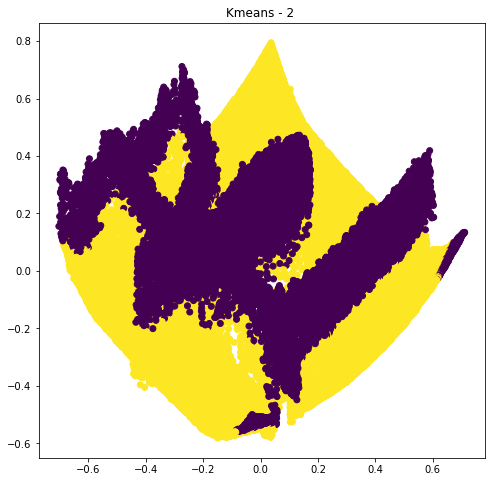

In [73]:
k_means = KMeans(n_clusters=2,random_state=0).fit(bird_scaled_data)
y_label =k_means.labels_
plt.figure(figsize=(8,8))
plt.scatter(x=bird_pca[:,1],y=bird_pca[:,2],c=y_label)
plt.title('Kmeans - 2 ')
plt.show()

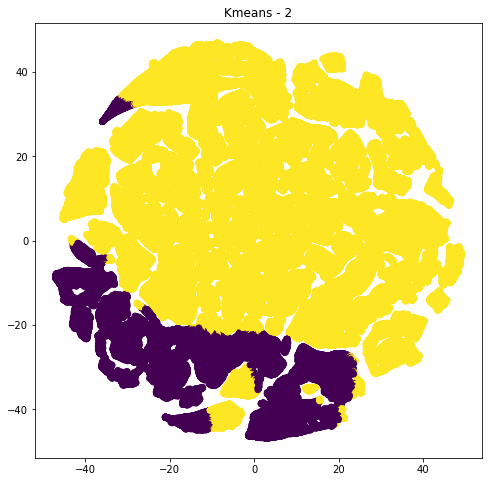

In [74]:
k_means = KMeans(n_clusters=2,random_state=0).fit(bird_scaled_data)
y_label =k_means.labels_
plt.figure(figsize=(8,8))
plt.scatter(x=bird_tsne70_res[:,0],y=bird_tsne70_res[:,1],c=y_label)
plt.title('Kmeans - 2')
plt.show()

GMM Clustering Segmentation

Plane

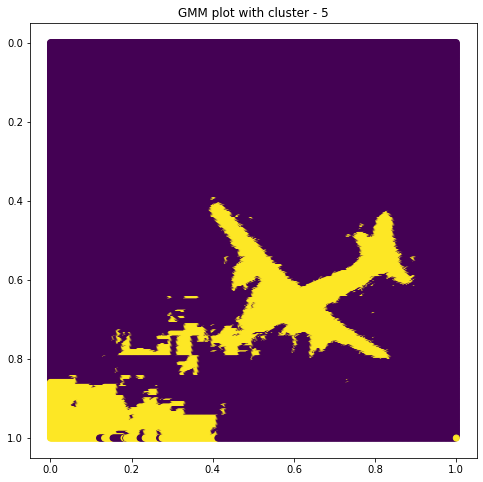

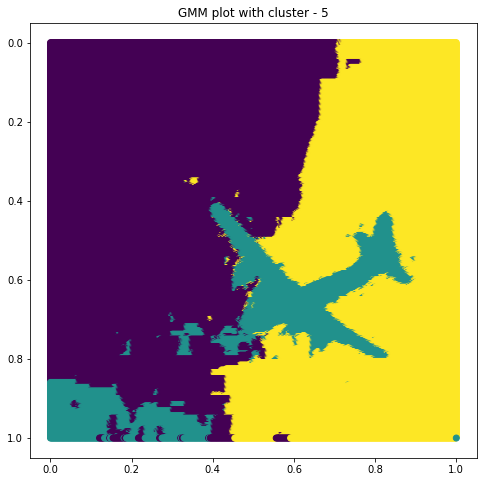

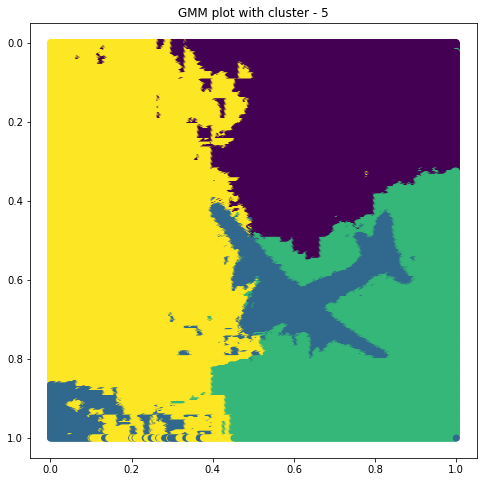

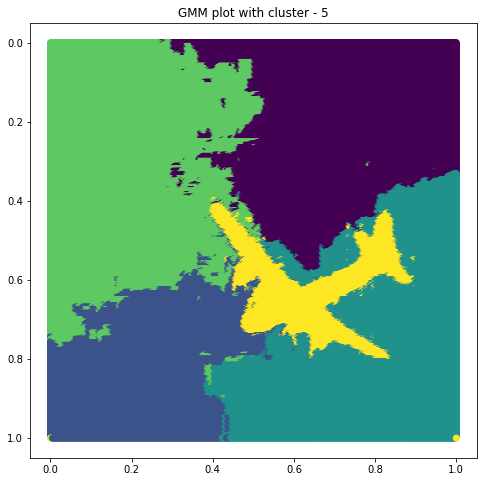

In [75]:
from sklearn.mixture import GaussianMixture
for i in [2,3,4,5]:
    gmm = GaussianMixture(n_components=i,random_state=0)
    gmm.fit(plane_data_scaled)
    lab = gmm.predict(plane_data_scaled)
    plt.figure(figsize=(8,8))
    plt.scatter(plane_data_scaled.iloc[:,1],y=plane_data_scaled.iloc[:,0],c=lab)
    plt.title('GMM plot with cluster - %d'%cluster)
    plt.gca().invert_yaxis()
    plt.show()

In [76]:
for i in [2,3,4,5]:
    gmm = GaussianMixture(n_components=i,random_state=0)
    gmm.fit(plane_data_scaled)
    lab = gmm.predict(plane_data_scaled)
    print('K value:',cluster)
    print('CH score',calinski_harabasz_score(plane_data_scaled,lab))

K value: 5
CH score 36098.40645823758
K value: 5
CH score 58093.9669826035
K value: 5
CH score 67746.28201320177
K value: 5
CH score 93550.33833769854


In [ ]:
for i in [2,3,4,5]:
    gmm = GaussianMixture(n_components=i,random_state=0)
    gmm.fit(plane_data_scaled)
    lab = gmm.predict(plane_data_scaled)
    print('K value:',cluster)
    print('Silhouette score',silhouette_score(plane_data_scaled,lab))

K value: 5
Silhouette score 0.32070008051512433
K value: 5
Silhouette score 0.30486961930633094
K value: 5
Silhouette score 0.3185300694697362
K value: 5


In [ ]:
## PCA and TSNE for all clusters
for i in [2,3,4,5]:
    gmm = GaussianMixture(n_components=i,random_state=0)
    gmm.fit(plane_data_scaled)
    lab = gmm.predict(plane_data_scaled)
    plt.figure(figsize=(4,4))
    plt.scatter(x=plane_pca[:,1],y=plane_pca[:,2],c=lab)
    plt.title('Gaussian - %d'%cluster)
    plt.show()

In [ ]:
for i in [2,3,4,5]:
    gmm = GaussianMixture(n_components=i,random_state=0)
    gmm.fit(plane_data_scaled)
    lab = gmm.predict(plane_data_scaled)
    plt.figure(figsize=(4,4))
    plt.scatter(x=plane_tsne70_res[:,0],y=plane_tsne70_res[:,1],c=lab)
    plt.title('Gaussian - %d'%cluster)
    plt.show()

Returning PCA and TSNE plots to best display clustering results with k = 5

In [ ]:
gmm = GaussianMixture(n_components=5,random_state=0)
gmm.fit(plane_data_scaled)
lab = gmm.predict(plane_data_scaled)
plt.figure(figsize=(8,8))
plt.scatter(x=plane_pca[:,1],y=plane_pca[:,2],c=lab)
plt.title('Gaussian - 5 ')
plt.show()

In [ ]:
gmm = GaussianMixture(n_components=5,random_state=0)
gmm.fit(plane_data_scaled)
lab = gmm.predict(plane_data_scaled)
plt.figure(figsize=(8,8))
plt.scatter(x=plane_tsne70_res[:,0],y=plane_tsne70_res[:,1],c=lab)
plt.title('Gaussian - 5')
plt.show()

BIRD

In [ ]:
for i in [2,3,4,5]:
    gmm = GaussianMixture(n_components=i,random_state=0)
    gmm.fit(bird_scaled_data)
    lab = gmm.predict(bird_scaled_data)
    plt.figure(figsize=(8,8))
    plt.scatter(bird_scaled_data.iloc[:,1],y=bird_scaled_data.iloc[:,0],c=lab,s=50)
    plt.title('GMM plot with cluster - %d'%cluster)
    plt.gca().invert_yaxis()
    plt.show()

In [ ]:
for i in [2,3,4,5]:
    gmm = GaussianMixture(n_components=i,random_state=0)
    gmm.fit(bird_scaled_data)
    lab = gmm.predict(bird_scaled_data)
    print('K value:',cluster)
    print('CH score',calinski_harabasz_score(bird_scaled_data,lab))

In [ ]:
for i in [2,3,4,5]:
    gmm = GaussianMixture(n_components=i,random_state=0)
    gmm.fit(bird_scaled_data)
    lab = gmm.predict(bird_scaled_data)
    print('K value:',cluster)
    print('Silhouette score',silhouette_score(bird_scaled_data,lab))

In [ ]:
##Plot PCA and TSNE for all clusters:
for i in [2,3,4,5]:
    gmm = GaussianMixture(n_components=i,random_state=0)
    gmm.fit(bird_scaled_data)
    lab = gmm.predict(bird_scaled_data)
    plt.figure(figsize=(4,4))
    plt.scatter(x=bird_pca[:,1],y=bird_pca[:,2],c=lab)
    plt.title('Gaussian - %d '%cluster)
    plt.show()

In [ ]:
for i in [2,3,4,5]:
    gmm = GaussianMixture(n_components=i,random_state=0)
    gmm.fit(bird_scaled_data)
    lab = gmm.predict(bird_scaled_data)
    plt.figure(figsize=(4,4))
    plt.scatter(x=bird_tsne70_res[:,0],y=bird_tsne70_res[:,1],c=lab)
    plt.title('Gaussian - %d'%cluster)
    plt.show()

Returning PCA and TSNE plots to display clustering results

In [ ]:
gmm = GaussianMixture(n_components=3,random_state=0)
gmm.fit(bird_scaled_data)
lab = gmm.predict(bird_scaled_data)
plt.figure(figsize=(8,8))
plt.scatter(x=bird_pca[:,1],y=bird_pca[:,2],c=lab)
plt.title('Gaussian - 3 ')
plt.show()

In [ ]:
gmm = GaussianMixture(n_components=3,random_state=0)
gmm.fit(bird_scaled_data)
lab = gmm.predict(bird_scaled_data)
plt.figure(figsize=(8,8))
plt.scatter(x=bird_tsne70_res[:,0],y=bird_tsne70_res[:,1],c=lab)
plt.title('Gaussian - 3')
plt.show()

Hierarcichal Clustering Segmentation

Plane

In [ ]:
from sklearn.cluster import AgglomerativeClustering
plane_scaled_new_data = plane_data_scaled.sample(frac=0.01, replace=True, random_state=1)

In [ ]:
plane_scaled_new_data.shape

In [ ]:
for i in [2,3,4,5]:
    aggl_clust_model = AgglomerativeClustering(n_clusters=i,linkage='single')
    aggl_clust_model.fit(plane_scaled_new_data)
    lab = aggl_clust_model.labels_
    plt.figure(figsize=(8,8))
    plt.scatter(plane_scaled_new_data.iloc[:,1],y=plane_scaled_new_data.iloc[:,0],c=lab,s=50)
    plt.title('Hierarchical plot with cluster - %d'%cluster)
    plt.gca().invert_yaxis()
    plt.show()

In [ ]:
for i in [2,3,4,5]:
    aggl_clust_model = AgglomerativeClustering(n_clusters=i,linkage='single')
    aggl_clust_model.fit(plane_scaled_new_data)
    lab = aggl_clust_model.labels_
    print('K value:',cluster)
    print('CH score',calinski_harabasz_score(plane_scaled_new_data,lab))

In [ ]:
for i in [2,3,4,5]:
    aggl_clust_model = AgglomerativeClustering(n_clusters=i,linkage='single')
    aggl_clust_model.fit(plane_scaled_new_data)
    lab = aggl_clust_model.labels_
    print('K value:',cluster)
    print('Silhouette score',silhouette_score(plane_scaled_new_data,lab))

In [ ]:
pl_pca2 = PCA()
pl_pca2.fit(plane_scaled_new_data)
pl_pca3 = pl_pca2.fit_transform(plane_scaled_new_data)

In [ ]:
plane_tsne70_new = TSNE(n_components=2,perplexity=70)
plane_tsne70_new = plane_tsne70_new.fit_transform(plane_scaled_new_data)
plane_tsne70_data = pd.DataFrame(data=plane_tsne70_new,columns=['d1','d2'])

Using PCA and TSNE for all clusters

In [ ]:

for i in [2,3,4,5]:
    aggl_clust_model = AgglomerativeClustering(n_clusters=i,linkage='single')
    aggl_clust_model.fit(plane_scaled_new_data)
    lab = aggl_clust_model.labels_
    plt.figure(figsize=(4,4))
    plt.scatter(x=pl_pca3[:,1],y=pl_pca3[:,2],c=lab)
    plt.title('Hierarchical - %d'%cluster)
    plt.show()

In [ ]:
for i in [2,3,4,5]:
    aggl_clust_model = AgglomerativeClustering(n_clusters=i,linkage='single')
    aggl_clust_model.fit(plane_scaled_new_data)
    lab = aggl_clust_model.labels_
    plt.figure(figsize=(4,4))
    plt.scatter(x=plane_tsne70_new[:,0],y=plane_tsne70_new[:,1],c=lab)
    plt.title('Hierarchical -%d'%cluster)
    plt.show()

Returning PCA and TSNE plots to best display clustering results with k = 4

In [ ]:
aggl_clust_model = AgglomerativeClustering(n_clusters=i,linkage='single')
aggl_clust_model.fit(plane_scaled_new_data)
lab = aggl_clust_model.labels_
plt.figure(figsize=(8,8))
plt.scatter(x=pl_pca3[:,1],y=pl_pca3[:,2],c=lab)
plt.title('Hierarchical - 4')
plt.show()

Bird

In [ ]:
bird_scaled_data_new = bird_scaled_data.sample(frac=0.01, replace=True,random_state=1)
bird_scaled_data_new.shape

In [ ]:
for cluster in [2,3,4,5]:
    aggl_clust_model = AgglomerativeClustering(n_clusters=cluster,linkage='single')
    aggl_clust_model.fit(bird_scaled_data_new)
    lab = aggl_clust_model.labels_
    plt.figure(figsize=(8,8))
    plt.scatter(bird_scaled_data_new.iloc[:,1],y=bird_scaled_data_new.iloc[:,0],c=lab,s=50)
    plt.title('Hierarchical plot with cluster - %d'%cluster)
    plt.gca().invert_yaxis()
    plt.show()

In [ ]:
for cluster in [2,3,4,5]:
    aggl_clust_model = AgglomerativeClustering(n_clusters=cluster,linkage='single')
    aggl_clust_model.fit(bird_scaled_data_new)
    lab = aggl_clust_model.labels_
    print('K value:',cluster)
    print('CH score',calinski_harabasz_score(bird_scaled_data_new,lab))

In [ ]:
for cluster in [2,3,4,5]:
    aggl_clust_model = AgglomerativeClustering(n_clusters=cluster,linkage='single')
    aggl_clust_model.fit(bird_scaled_data_new)
    lab = aggl_clust_model.labels_
    print('K value:',cluster)
    print('Silhouette score',silhouette_score(bird_scaled_data_new,lab))

In [ ]:
bird_pca_sample = PCA()
bird_pca_sample.fit(bird_scaled_data_new)
bird_pca_result_sample = bird_pca_sample.fit_transform(bird_scaled_data_new)

In [ ]:
bird_tsne_70_sample = TSNE(n_components=2,perplexity=70)
bird_tsne_70_res_sample = bird_tsne_70_sample.fit_transform(bird_scaled_data_new)
bird_tsne_70_df_sample = pd.DataFrame(data=bird_tsne_70_res_sample,columns=['d1','d2'])

In [ ]:
#PCA and TSNE for all clusters
for cluster in [2,3,4,5]:
    aggl_clust_model = AgglomerativeClustering(n_clusters=cluster,linkage='single')
    aggl_clust_model.fit(plane_scaled_new_data)
    lab = aggl_clust_model.labels_
    plt.figure(figsize=(4,4))
    plt.scatter(x=pl_pca3[:,1],y=pl_pca3[:,2],c=lab)
    plt.title('Hierarchical - %d'%cluster)
    plt.show()

In [ ]:
for cluster in [2,3,4,5]:
    aggl_clust_model = AgglomerativeClustering(n_clusters=cluster,linkage='single')
    aggl_clust_model.fit(bird_scaled_data_new)
    lab = aggl_clust_model.labels_
    plt.figure(figsize=(4,4))
    plt.scatter(x=bird_tsne_70_res_sample[:,0],y=bird_tsne_70_res_sample[:,1],c=lab)
    plt.title('Hierarchical -%d'%cluster)
    plt.show()

Returning PCA and TSNE plots to best display clustering results with k = 4

In [ ]:
aggl_clust_model = AgglomerativeClustering(n_clusters=cluster,linkage='single')
aggl_clust_model.fit(bird_scaled_data_new)
lab = aggl_clust_model.labels_
plt.figure(figsize=(8,8))
plt.scatter(x=bird_pca_result_sample[:,1],y=bird_pca_result_sample[:,2],c=lab)
plt.title('Hierarchical - 4')
plt.show()

In [ ]:
aggl_clust_model = AgglomerativeClustering(n_clusters=4,linkage='single')
aggl_clust_model.fit(bird_scaled_data_new)
lab = aggl_clust_model.labels_
plt.figure(figsize=(8,8))
plt.scatter(x=bird_tsne_70_res_sample[:,0],y=bird_tsne_70_res_sample[:,1],c=lab)
plt.title('Hierarchical - 4')
plt.show()

To reduce execution time for hierarchial clustering, data is sampled by 0.01% to assist in analysis

-> GMM and K Means clustering have different assignment techniques. K Means does hard assignment whereas GMM performs soft assignment.
-> K Means performs distance calculation and GMM calculates weighted distance
-> K Means generates a clear structure of the plane and bird in comparison with GMM that generates a blurred structure.
-> Ideal k values are choosen on the basis of Silhoutte score and plots.
-> TSNE plots are for perplexity of 70 mostly. PC1,PC2 are x,y co-ordinates for PCA with clusters.